<a href="https://colab.research.google.com/github/stochasticats/imdb-review-sentiment-classifier/blob/master/IMDb_Movie_Review_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)
import os
import shutil
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2.4.1


## Load Data and Data Pre-Processing
Here, I load up the data from ai.standford and then clean it up before doing analysis and modelling.

Let's remove the stopwords, words that contribute no meaning to our reviews, and remove special characters.

In [4]:
!wget "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

--2021-02-07 19:17:51--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  25.2MB/s    in 3.4s    

2021-02-07 19:17:54 (23.6 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [5]:
%%capture
!tar -xvf "/content/aclImdb_v1.tar.gz"

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
#stopwords = stopwords + ['character', 'movie', 'film', 'even', 'time', 'way', 'much', 'well', 'scene', 'actor', 'thing', 'think', 'director', 'show', 'story', 'make', 'one']
print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [16]:
loc = '/content/aclImdb/train/pos'
os.chdir(loc)
filelist = os.listdir()

reviews_pos = []
labels_pos = []

for f in filelist:
  with open (f, "r") as myfile:
    labels_pos.append(1)
    review = myfile.read()
    reviews_pos.append(review)

loc = '/content/aclImdb/train/neg'
os.chdir(loc)
filelist = os.listdir()

reviews_neg = []
labels_neg = []

for f in filelist:
  with open (f, "r") as myfile:
    labels_neg.append(0)
    review = myfile.read()
    reviews_neg.append(review)

Let's take a look at a random positive review and a random negative review.

In [17]:
randn = random.randint(0,len(reviews_pos))

print("Length of reviews that are positive:")
print(len(reviews_pos))
print("Example of a positive review:")
print(reviews_pos[randn])
print("The label:")
print(labels_pos[randn])
print(" ")
print("Length of reviews that are negative:")
print(len(reviews_neg))
print("Example of a negative review:")
print(reviews_neg[randn])
print("The label:")
print(labels_neg[randn])

Length of reviews that are positive:
12500
Example of a positive review:
If it's action and adventure you want in a movie, then you'd be best advised to look elsewhere. On the other hand, if it's a lazy day and you want a good movie to go along with that mood, check out "The Straight Story."<br /><br />Richard Farnsworth puts on a compelling performance as the gentle and gentlemanly Alvin Straight, in this true story of Alvin's journey on a riding mower across three states to see his estranged brother who has had a stroke.<br /><br />Farnsworth is perfect in this role, as he travels his long and winding road, making friends of strangers and doling out lots of grandfatherly type advice about family along the way. The story moves along as slowly as the riding mower, but somehow manages to keep the viewer watching, waiting for the next life lesson Alvin's going to offer.<br /><br />Stretch out on the couch, relax and enjoy. It's the only way to watch this very good movie, which rates a 7/

This block removes special characters from the reviews

In [18]:
import spacy
import re,string,unicodedata

def preprocess(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text=re.sub('[\W]+',' ', text.lower()) +\
       ' '.join(emoticons).replace('-','')  
    return text

In [19]:
denoised_reviews_pos = []
for review in reviews_pos:
  denoised_reviews_pos.append(preprocess(review))

denoised_reviews_neg = []
for review in reviews_neg:
  denoised_reviews_neg.append(preprocess(review))

Now lets take a look at a denoised positive review and denoised negative review

In [20]:
print("Example of a denoised positive review:")
print(denoised_reviews_pos[randn])
print(" ")
print("Example of a denoised negative review:")
print(denoised_reviews_neg[randn])

Example of a denoised positive review:
if it s action and adventure you want in a movie then you d be best advised to look elsewhere on the other hand if it s a lazy day and you want a good movie to go along with that mood check out the straight story richard farnsworth puts on a compelling performance as the gentle and gentlemanly alvin straight in this true story of alvin s journey on a riding mower across three states to see his estranged brother who has had a stroke farnsworth is perfect in this role as he travels his long and winding road making friends of strangers and doling out lots of grandfatherly type advice about family along the way the story moves along as slowly as the riding mower but somehow manages to keep the viewer watching waiting for the next life lesson alvin s going to offer stretch out on the couch relax and enjoy it s the only way to watch this very good movie which rates a 7 10 in my book 
 
Example of a denoised negative review:
the title should have been th

Now I take out the stop words from each review. Stop words are the most common words in natural language. For analyzing and building an NLP model, this step is essential as it removes words that add no meaning to the reviews.

In [21]:
cleaned_reviews_pos = []

for review in denoised_reviews_pos:
  temp_list = []
  for word in review.split():
    if word not in stopwords:
      temp_list.append(word)
  cleaned_reviews_pos.append(' '.join(temp_list))

In [22]:
cleaned_reviews_neg = []

for review in denoised_reviews_neg:
  temp_list = []
  for word in review.split():
    if word not in stopwords:
      temp_list.append(word)
  cleaned_reviews_neg.append(' '.join(temp_list))

Now we see the text as it will be input into the deep learning model.

In [23]:
print("Example of a cleaned positive review: ")
print(cleaned_reviews_pos[randn])
print(" ")
print("Example of a cleaned negative review: ")
print(cleaned_reviews_neg[randn])

Example of a cleaned positive review: 
action adventure want movie best advised look elsewhere hand lazy day want good movie go along mood check straight story richard farnsworth puts compelling performance gentle gentlemanly alvin straight true story alvin journey riding mower across three states see estranged brother stroke farnsworth perfect role travels long winding road making friends strangers doling lots grandfatherly type advice family along way story moves along slowly riding mower somehow manages keep viewer watching waiting next life lesson alvin going offer stretch couch relax enjoy way watch good movie rates 7 10 book
 
Example of a cleaned negative review: 
title walker walk nothing movie good description movie really comply plot thing get movie good son low life terrible person sorry expend money time movie saw people leaving theater middle movie stayed hoping better mistake got worse suggestion make producer direct life another field making movies definitely cup tea


## Exploratory Analysis of Reviews
Before we build the deep learning NLP model, I'll perform some basic analysis. I'll generate word clouds and look at the distribution of length of reviews.

In [24]:
text_pos = " ".join(review for review in cleaned_reviews_pos)

text_neg = " ".join(review for review in cleaned_reviews_neg)

I generate two word clouds for the positive reviews and negative reviews. This gives us a visualization of most used words in each set.

In [25]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud_pos = WordCloud(background_color="white").generate(text_pos)
wordcloud_neg = WordCloud(background_color="white").generate(text_neg)

Word cloud for positive reviews: 


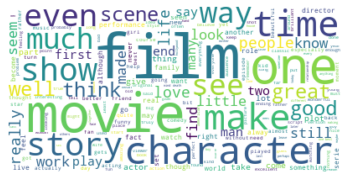

In [26]:
print("Word cloud for positive reviews: ")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud for negative reviews: 


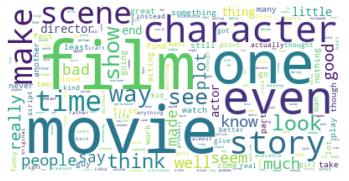

In [27]:
print("Word cloud for negative reviews: ")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

This doesn't actually tell us much, but I did use this to add more stop words specific to film as they add no meaning.

Here are the stop words I added: ['character', 'movie', 'film', 'even', 'time', 'way', 'much', 'well', 'scene', 'actor', 'thing', 'think', 'director', 'show', 'story', 'make', 'one']

In [28]:
reviews = cleaned_reviews_pos + cleaned_reviews_neg
labels = labels_pos + labels_neg

In [29]:
dataframe = pd.DataFrame(
    {'reviews': reviews,
     'labels': labels,
    })
from sklearn.utils import shuffle
dataframe = shuffle(dataframe).reset_index(drop=True)

In [30]:
dataframe.head(n=20)

,reviews,labels
0,moving tale scotland legendary hero rob roy ba...,1
1,man anyone expecting great zombie movie readin...,1
2,step aside hollywood veterans wayan brothers a...,0
3,beginning film little clunky also confusing si...,1
4,terrible movie acting bad pacing bad cinematog...,0
5,tommy jones matt dillon gambling world proud v...,1
6,sad little film bears little similarity 1971 b...,0
7,must warn spoilers start got spanish judges fe...,1
8,probably best star wars movies starting point ...,1
9,low expectations movie start failed meet even ...,0


Now let's look at the distribution of review length.

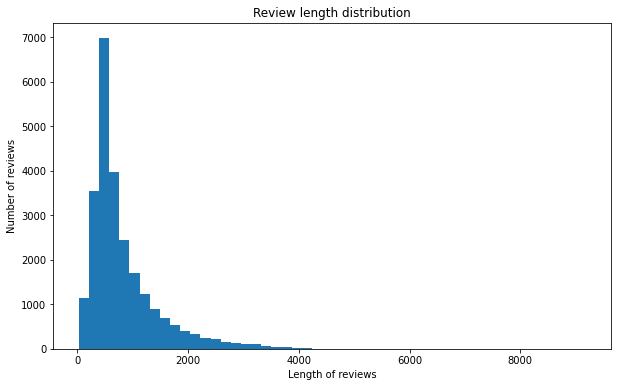

In [31]:
plt.figure(figsize=(10, 6))
plt.hist([len(review) for review in dataframe['reviews']], 50)
plt.xlabel('Length of reviews')
plt.ylabel('Number of reviews')
plt.title('Review length distribution')
plt.show()

## Deep Learning Model
Now we build our neural network that will classify sentiment for the reviews.

First we set up some basic parameters.

In [32]:
vocab_size = 6000
embedding_dim = 128
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

Now I split the data set into a training and validation set.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(dataframe['reviews'], dataframe['labels'], test_size=0.2, random_state=42)

In [34]:
print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(y_valid))

20000
20000
5000
5000


Here I tokenize and pad the reviews, an essential step before we feed the data into a neural network.

In [35]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_seqs = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seqs, padding=padding_type, maxlen=max_length)

In [36]:
X_valid_seqs = tokenizer.texts_to_sequences(X_valid)
X_valid_padded = pad_sequences(X_valid_seqs, padding=padding_type, maxlen=max_length)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          768000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          98816     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 870,977
Trainable params: 870,977
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs = 128
history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=128, validation_data=(X_valid_padded, y_valid), verbose=1)

Epoch 1/128
157/157 [==============================] - 16s 42ms/step - loss: 0.5635 - accuracy: 0.7106 - val_loss: 0.3119 - val_accuracy: 0.8664
Epoch 2/128
157/157 [==============================] - 6s 37ms/step - loss: 0.2425 - accuracy: 0.9051 - val_loss: 0.2897 - val_accuracy: 0.8800
Epoch 3/128
157/157 [==============================] - 6s 38ms/step - loss: 0.1752 - accuracy: 0.9367 - val_loss: 0.3168 - val_accuracy: 0.8788
Epoch 4/128
157/157 [==============================] - 6s 37ms/step - loss: 0.1261 - accuracy: 0.9576 - val_loss: 0.3306 - val_accuracy: 0.8686
Epoch 5/128
157/157 [==============================] - 6s 37ms/step - loss: 0.1037 - accuracy: 0.9661 - val_loss: 0.3921 - val_accuracy: 0.8670
Epoch 6/128
157/157 [==============================] - 6s 37ms/step - loss: 0.0746 - accuracy: 0.9772 - val_loss: 0.4443 - val_accuracy: 0.8602
Epoch 7/128
157/157 [==============================] - 6s 37ms/step - loss: 0.0583 - accuracy: 0.9834 - val_loss: 0.5140 - val_accuracy

## Results
Let's see how well our model did! I plot the accuracy and loss over the training epochs.

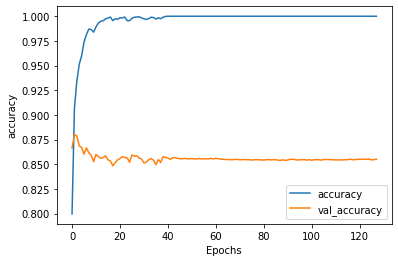

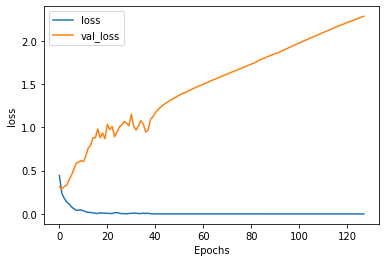

In [40]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Let's test our model on a movie review from IMDb.

In [41]:
Review = 'Where to begin? This headliner at the Fecal Film Festival is without a doubt the worst thing I have ever seen. Entirely without any redeeming value whatsoever, not even camp value mind you... this film lacks any substantive plot or story line that is discernable, nor comprehendable dialogue, nor even interest as a soft core porno.' #@param {type:"string"}
Review = preprocess(Review)
Review = tokenizer.texts_to_sequences([Review])
Review = pad_sequences(Review, padding=padding_type, maxlen=max_length)
prediction = model.predict(Review)
print(prediction)

[[9.693686e-19]]


Very negative, which is definitely how I'd classify the review I picked!